# Ex4: Hypothesis Testing - Chi-squared test

# Câu 1: Chi-squared test
- Giả sử có 100 người, có trình độ học vấn khác nhau tại một tỉnh nọ. Câu hỏi đặt ra là có sự liên quan giữa giới tính và trình độ học vấn hay không? 

|Loai|Cao dang|Dai Hoc|Sau dai hoc|
|---|---|---|---|
|Nam|6|35|15|
|Nu|7|31|6|

# Câu 2: Chi-squared test
- Cho dữ liệu titanic/train.csv chứa thông tin về các hành khách trên con tàu Titanic. Hãy cho biết có mối quan hệ nào giữa PClass và Sex hay không? Chứng minh.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold

# Bài 1: Gợi ý

In [2]:
# chi-squared test with similar proportions
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [3]:
# contingency table
table = [[6, 35, 15], [7,  31,  6]]
table

[[6, 35, 15], [7, 31, 6]]

In [4]:
stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(expected)

dof=2
[[ 7.28 36.96 11.76]
 [ 5.72 29.04  9.24]]


In [5]:
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))

probability=0.950, critical=5.991, stat=2.776


In [6]:
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

Independent (fail to reject H0)


In [7]:
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

significance=0.050, p=0.250
Independent (fail to reject H0)


# Câu 2: Gợi ý
- Cho dữ liệu titanic/train.csv chứa thông tin về các hành khách trên con tàu Titanic. Hãy cho biết có mối quan hệ nào giữa PClass và Sex hay không? Chứng minh.

In [8]:
import pandas as pd
import numpy as np

In [9]:
data = pd.read_csv("titanic/train.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
# chi-squared test with similar proportions
from scipy.stats import chi2_contingency
from scipy.stats import chi2

# contingency table:  Ho: Pclass and Sex independent
table = pd.crosstab(data['Pclass'], data['Sex'])
table

Sex,female,male
Pclass,,
1,94,122
2,76,108
3,144,347


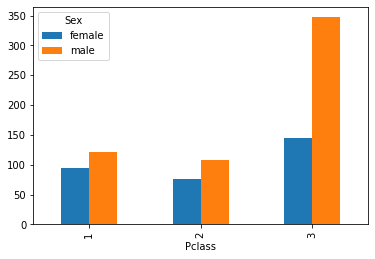

In [12]:
table.plot.bar()

In [13]:
stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(expected)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))

# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=2
[[ 76.12121212 139.87878788]
 [ 64.84399551 119.15600449]
 [173.03479237 317.96520763]]
probability=0.950, critical=5.991, stat=16.971
significance=0.050, p=0.000
Dependent (reject H0)
Dependent (reject H0)
